In [1]:
!pip install langchain_community
!pip install torch
!pip install langchain
!pip install jq
!pip install chromadb
!pip install --quiet langchain_experimental langchain_openai
!pip install sentence_transformers


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/416.9 kB ? eta -:--:--
   -- ------------------------------------- 30.7/416.9 kB 1.3 MB/s eta 0:00:01
   -------- ------------------------------- 92.2/416.9 kB 1.3 MB/s eta 0:00:01
   --------------------------- ------------ 286.7/416.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 416.9/416.9 kB 2.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install -q torch transformers transformers accelerate bitsandbytes langchain sentence-transformers faiss-gpu openpyxl pacmap

ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
from langchain_community.document_loaders import JSONLoader
import json
from pathlib import Path
from pprint import pprint

In [ ]:
loader = JSONLoader(
    file_path='./drive/MyDrive/Db/dataset/PDVN.json',
    jq_schema='.[].NoiDung',
    text_content=False)

data = loader.load()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

  0%|          | 0/81367 [00:00<?, ?it/s]

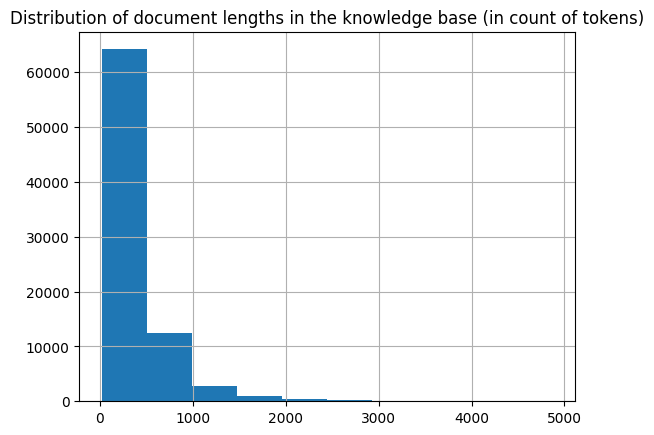

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(data)]
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]

EMBEDDING_MODEL_NAME = "vinai/PhoGPT-4B-Chat"
text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME),
        chunk_size = 512,
        chunk_overlap= 112,
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/844k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

In [ ]:
docs_processed = []
for doc in data:
  docs_processed += text_splitter.split_documents([doc])

In [ ]:
# Remove duplicates
unique_texts = {}
docs_processed_unique = []
for doc in docs_processed:
  if doc.page_content not in unique_texts:
    unique_texts[doc.page_content] = True
    docs_processed_unique.append(doc)

In [ ]:
len(docs_processed_unique)

In [ ]:
len(data)

In [ ]:
docs_processed_unique[1006]

Document(page_content='(Điều 30 Nghị định số 47/2014/NĐ-CP, có hiệu lực thi hành kể từ ngày 01/07/2014, có nội dung được bổ sung bởi Điều 4 Nghị định số 01/2017/NĐ-CP có hiệu lực thi hành kể từ ngày 03/03/2017)\n1. Việc trừ khoản tiền chưa thực hiện nghĩa vụ tài chính về đất đai vào số tiền được bồi thường quy định tại Khoản 4 Điều 93 của Luật Đất đai được thực hiện theo quy định sau đây:\na) Khoản tiền chưa thực hiện nghĩa vụ tài chính về đất đai bao gồm tiền sử dụng đất, tiền thuê đất phải nộp cho Nhà nước nhưng đến thời điểm thu hồi đất vẫn chưa nộp;\nb) Số tiền chưa thực hiện nghĩa vụ tài chính quy định tại Điểm a Khoản này được xác định theo quy định của pháp luật về thu tiền sử dụng đất; thu tiền thuê đất, thuê mặt nước.\nTrường hợp số tiền chưa thực hiện nghĩa vụ tài chính đến thời điểm có quyết định thu hồi đất lớn hơn số tiền được bồi thường, hỗ trợ thì hộ gia đình, cá nhân tiếp tục được ghi nợ số tiền chênh lệch đó; nếu hộ gia đình, cá nhân được bố trí tái định cư thì sau khi

In [ ]:
docs_processed_unique[1010].page_content

In [ ]:
docs_processed_unique[15000].page_content

'(Điều 3 Quyết định số 13/2007/QĐ-BGDĐT, có hiệu lực thi hành kể từ ngày 27/06/2007)\nChánh Văn phòng, Vụ trưởng Vụ Giáo dục thường xuyên, Thủ trưởng các đơn vị có liên quan thuộc Bộ Giáo dục và Đào tạo, Chủ tịch Ủy ban nhân dân tỉnh, thành phố trực thuộc Trung ương, Giám đốc sở giáo dục và đào tạo chịu trách nhiệm thi hành Quyết định này.'

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores.chroma import Chroma
from langchain_community.vectorstores import FAISS
from langchain.document_loaders import DirectoryLoader

#ST_MODEL_PATH = "keepitreal/vietnamese-sbert"
ST_MODEL_PATH = "VoVanPhuc/sup-SimCSE-VietNamese-phobert-base"
DB_PERSIST_PATH = "./drive/MyDrive/Db/vector1/"

embeddings = HuggingFaceEmbeddings(model_name=ST_MODEL_PATH, model_kwargs={"device": "cuda"})
vectordb = Chroma.from_documents(documents=docs_processed_unique,
                                 embedding=embeddings,
                                 persist_directory=DB_PERSIST_PATH)

In [ ]:
vectordb.persist()

In [ ]:
from langchain.vectorstores.chroma import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
ST_MODEL_PATH = "keepitreal/vietnamese-sbert"
DB_PERSIST_PATH = "./drive/MyDrive/Db/vector1"
embeddings = HuggingFaceEmbeddings(model_name=ST_MODEL_PATH, model_kwargs={"device": "cpu"})
topic_vectordb = Chroma(embedding_function=embeddings,
                  persist_directory=DB_PERSIST_PATH)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/752 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
query = '''
Trình tự, thủ tục cấp số định danh cá nhân đối với công dân đã đăng ký khai sinh, đăng ký thường trú
'''

In [ ]:
context = topic_vectordb.similarity_search( query, k=5)

In [ ]:
print(context[0].page_content)

(Điều 3 Nghị định số 87/2020/NĐ-CP, có hiệu lực thi hành kể từ ngày 15/09/2020)
	1. Thông tin trong Cơ sở dữ liệu hộ tịch điện tử bao gồm:
	a) Các thông tin hộ tịch của cá nhân được xác lập khi đăng ký khai sinh: họ tên; ngày, tháng, năm sinh; giới tính; nơi sinh; dân tộc, quốc tịch, quê quán, số định danh cá nhân của người được đăng ký khai sinh; họ tên, ngày, tháng, năm sinh, dân tộc, quốc tịch, quê quán, nơi cư trú, số định danh cá nhân, giấy tờ tùy thân của cha, mẹ của người được đăng ký khai sinh; họ tên, số định danh cá nhân, giấy tờ tùy thân của người đi đăng ký khai sinh, mối quan hệ với người được khai sinh; số đăng ký, quyển số, ngày, tháng, năm đăng ký, tên cơ quan đăng ký khai sinh; họ tên, chức vụ của người ký Giấy khai sinh;
	b) Các thông tin hộ tịch của cá nhân là công dân Việt Nam được xác lập khi ghi vào Sổ hộ tịch việc khai sinh đã được giải quyết tại cơ quan có thẩm quyền nước ngoài (sau đây gọi là ghi chú khai sinh): họ tên; ngày, tháng, năm sinh; giới tính; nơi sin